# Zimnat Insurance Recommendation Challenge

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
# read data to pandas 
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")
submission = pd.read_csv("data/SampleSubmission.csv")

#print all dataset shape
print(train.shape, test.shape,submission.shape)

(29132, 29) (10000, 29) (210000, 2)


In [3]:
# display top five rows
train.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [4]:
#show data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
ID                          29132 non-null object
join_date                   29130 non-null object
sex                         29132 non-null object
marital_status              29132 non-null object
birth_year                  29132 non-null int64
branch_code                 29132 non-null object
occupation_code             29132 non-null object
occupation_category_code    29132 non-null object
P5DA                        29132 non-null int64
RIBP                        29132 non-null int64
8NN1                        29132 non-null int64
7POT                        29132 non-null int64
66FJ                        29132 non-null int64
GYSR                        29132 non-null int64
SOP4                        29132 non-null int64
RVSZ                        29132 non-null int64
PYUQ                        29132 non-null int64
LJR9                        29132 non-null int64
N2

In [5]:
#Store Products ID in Multidimensional array
products =train[['P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']]
products_t =test[['P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']]

In [6]:
#Axis Transformation
train = train.melt(id_vars=train.columns[:8], value_vars=products, var_name = "PCODE", value_name="Label" )
test = test.melt(id_vars=test.columns[:8], value_vars=products, var_name = "PCODE", value_name="Label" )

In [7]:
#A merger
train['combiner']='x'

In [8]:
#Set
data=pd.concat([train,test],sort=False).reset_index(drop=True)

In [9]:
#preview random 3 sample
data.sample(3)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,Label,combiner
773922,LPANLED,1/4/2020,M,U,1976,94KC,QZYX,90QI,JWFN,0,NaN
676951,616S5AG,1/12/2019,F,M,1975,30H5,0KID,T4MS,SOP4,0,NaN
457858,X48L140,1/4/2018,M,M,1979,UAOD,SST3,56SI,QBOL,0,x


In [10]:
#Confirm Distribution (TEST AND SAMPLE SUBMISSION FILE)
print('==' * 18);print('TRAIN LABEL DISTRIBUTION');print('==' * 18);print(train['Label'].value_counts())
print('==' * 18);print('TEST LABEL DISTRIBUTION');print('==' * 18);print(test['Label'].value_counts())
print('==' * 18);print('SAMPLE SUBMISSION LABEL DISTRIBUTION');print('==' * 18);print(submission['Label'].value_counts())

TRAIN LABEL DISTRIBUTION
0    545419
1     66353
Name: Label, dtype: int64
TEST LABEL DISTRIBUTION
0    197147
1     12853
Name: Label, dtype: int64
SAMPLE SUBMISSION LABEL DISTRIBUTION
0    197147
1     12853
Name: Label, dtype: int64


In [11]:
train=data[data.combiner.notnull()].reset_index(drop=True);test=data[data.combiner.isna()].reset_index(drop=True)
train.drop('combiner', inplace=True, axis=1);test.drop(['Label','combiner'], inplace=True, axis=1)
print(train.shape, test.shape, submission.shape)

(611772, 10) (210000, 9) (210000, 2)


In [12]:
#Concatenate new column towards submission requirement
train['ID X PCODE'] = train['ID'] + ' X ' + train['PCODE']
test['ID X PCODE'] = test['ID'] + ' X ' + test['PCODE']

In [13]:
train.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,Label,ID X PCODE
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,P5DA,0,4WKQSBB X P5DA
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,P5DA,0,CP5S02H X P5DA
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,P5DA,0,2YKDILJ X P5DA
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,P5DA,0,2S9E81J X P5DA
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,P5DA,0,BHDYVFT X P5DA


In [14]:
test.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,ID X PCODE
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,P5DA,F86J5PC X P5DA
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,P5DA,H6141K3 X P5DA
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,P5DA,RBAYUXZ X P5DA
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,P5DA,KCBILBQ X P5DA
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,P5DA,LSEC1ZJ X P5DA


### Explanatory Data Analysis

In [15]:
def examine_data_frame( df):
    for name in df.columns:
        print("----------")
        print(df[ name].dtype)
        if df[name].dtype is np.dtype( 'O'):
            print(df[name].value_counts())
            print("Name: ", name)
        else:
            print(df[ name].describe())

examine_data_frame(train)

----------
object
J6598VV    21
19WFWTT    21
HZC1Y1Z    21
8OULCBF    21
VPJFULL    21
S5ASAJY    21
S3BUCAK    21
1O9S9WJ    21
LGA3ACA    21
2I0RT8I    21
DQI1IVC    21
KESJ5HL    21
I5KVYRV    21
K8KXH7W    21
QPN2ED2    21
06OF1DN    21
VRGPNY7    21
MI0YTTA    21
TUU8EF6    21
VSDCRX6    21
HR0WXAZ    21
3O8E7UE    21
VNKFLXY    21
4MMDDRM    21
Y4LJYCS    21
6UYL6PD    21
P3YQ3EJ    21
FTQ2JZ4    21
S7T9FKP    21
2D055KI    21
           ..
RC7XP1P    21
XZ2XE24    21
27Q9QX0    21
947872U    21
6M5I86I    21
21ESGWR    21
FB7GAVF    21
ZP4S9TW    21
CXMS6M3    21
IOKEV5M    21
K5G5P3R    21
J602MBQ    21
0TMUXVW    21
TQB1EBB    21
HGWNN4W    21
6FGSIYD    21
ZZO8LTD    21
RPEC8KR    21
95K6WPE    21
AEXRSOW    21
TKENYTH    21
W6PKRMJ    21
11CPAL4    21
ZB9AUQ3    21
G8HPIYN    21
UE6MGJ6    21
B0FD052    21
W6AJ2GZ    21
GWZP3AE    21
GV5V2J6    21
Name: ID, Length: 29132, dtype: int64
Name:  ID
----------
object
1/5/2018      27699
1/5/2019      25179
1/4/2018      23583
1/

In [16]:
# Create "Year", "Month" & "DayOfMonth" for train
train['join_date']= pd.to_datetime(train['join_date'], format= "%d/%m/%Y")
train["join_year"] = train["join_date"].apply(lambda x: x.year)
train["join_month"] = train["join_date"].apply(lambda x: x.month)
train["join_day_of_month"] = train["join_date"].apply(lambda x: x.day)

# Create "Year", "Month" & "DayOfMonth" for test
test['join_date']= pd.to_datetime(test['join_date'], format= "%d/%m/%Y")
test["join_year"] = test["join_date"].apply(lambda x: x.year)
test["join_month"] = test["join_date"].apply(lambda x: x.month)
test["join_day_of_month"] = test["join_date"].apply(lambda x: x.day)

In [17]:
#calculate age from year of birth
today = date.today()
train['age']= train['birth_year'].apply(lambda x : today.year - x)

test['age'] = test['birth_year'].apply(lambda x : today.year - x)

In [18]:
train.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,Label,ID X PCODE,join_year,join_month,join_day_of_month,age
0,4WKQSBB,2019-02-01,F,M,1987,1X1H,2A7I,T4MS,P5DA,0,4WKQSBB X P5DA,2019.0,2.0,1.0,33
1,CP5S02H,2019-06-01,F,M,1981,UAOD,2A7I,T4MS,P5DA,0,CP5S02H X P5DA,2019.0,6.0,1.0,39
2,2YKDILJ,2013-06-01,M,U,1991,748L,QZYX,90QI,P5DA,0,2YKDILJ X P5DA,2013.0,6.0,1.0,29
3,2S9E81J,2019-08-01,M,M,1990,1X1H,BP09,56SI,P5DA,0,2S9E81J X P5DA,2019.0,8.0,1.0,30
4,BHDYVFT,2019-08-01,M,M,1990,748L,NO3L,T4MS,P5DA,0,BHDYVFT X P5DA,2019.0,8.0,1.0,30


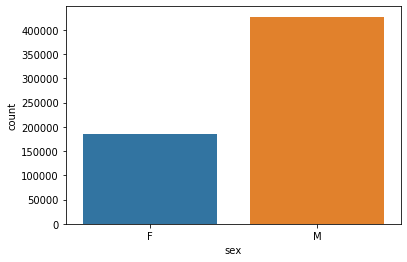

In [19]:
#sex count plot
sns.countplot(train['sex'])
plt.show()

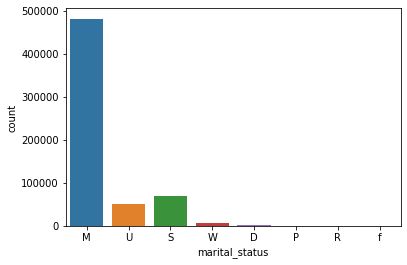

In [20]:
#marital status count plot
sns.countplot(train['marital_status'])
plt.show()

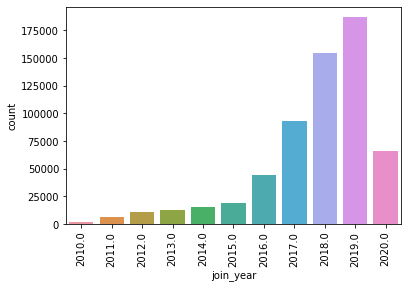

In [21]:
#join year count plot
sns.countplot(train['join_year'])
plt.xticks(rotation=90)
plt.show()

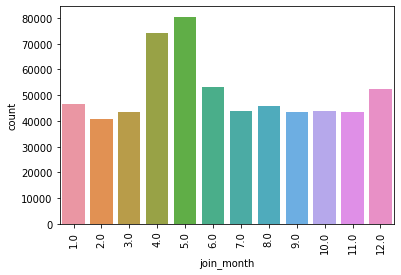

In [22]:
#join month count plot
sns.countplot(train['join_month'])
plt.xticks(rotation=90)
plt.show()

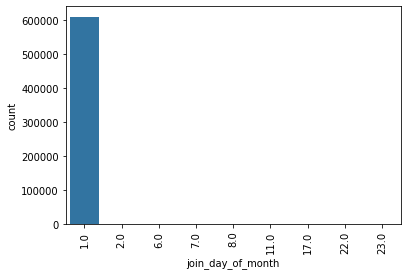

In [23]:
#join day of month count plot
sns.countplot(train['join_day_of_month'])
plt.xticks(rotation=90)
plt.show()

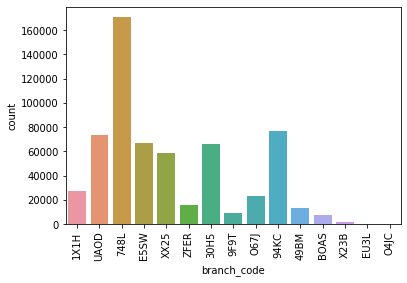

In [24]:
#Branch code count plot
sns.countplot(train['branch_code'])
plt.xticks(rotation=90)
plt.show()

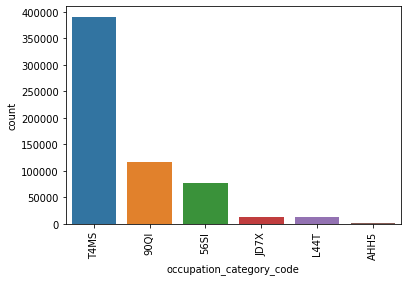

In [25]:
#Occupation category code count plot
sns.countplot(train['occupation_category_code'])
plt.xticks(rotation=90)
plt.show()

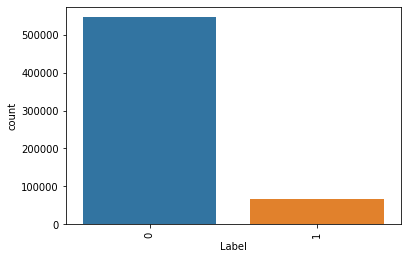

In [26]:
#Label count plot
sns.countplot(train['Label'])
plt.xticks(rotation=90)
plt.show()

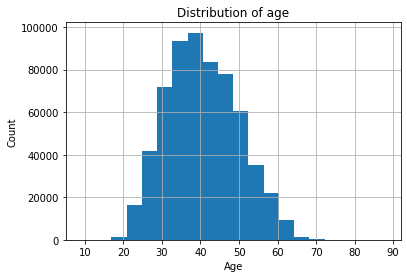

In [27]:
#plot distribution of age
train['age'].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age")
plt.show()

### Bivariate data Analysis

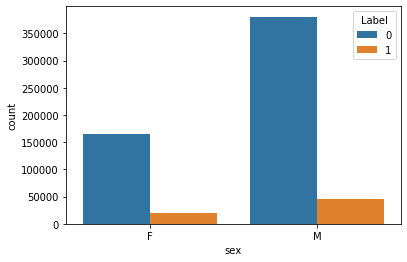

In [28]:
#sex count plot with Label
sns.countplot(x= 'sex',hue="Label",data=train)
plt.show()

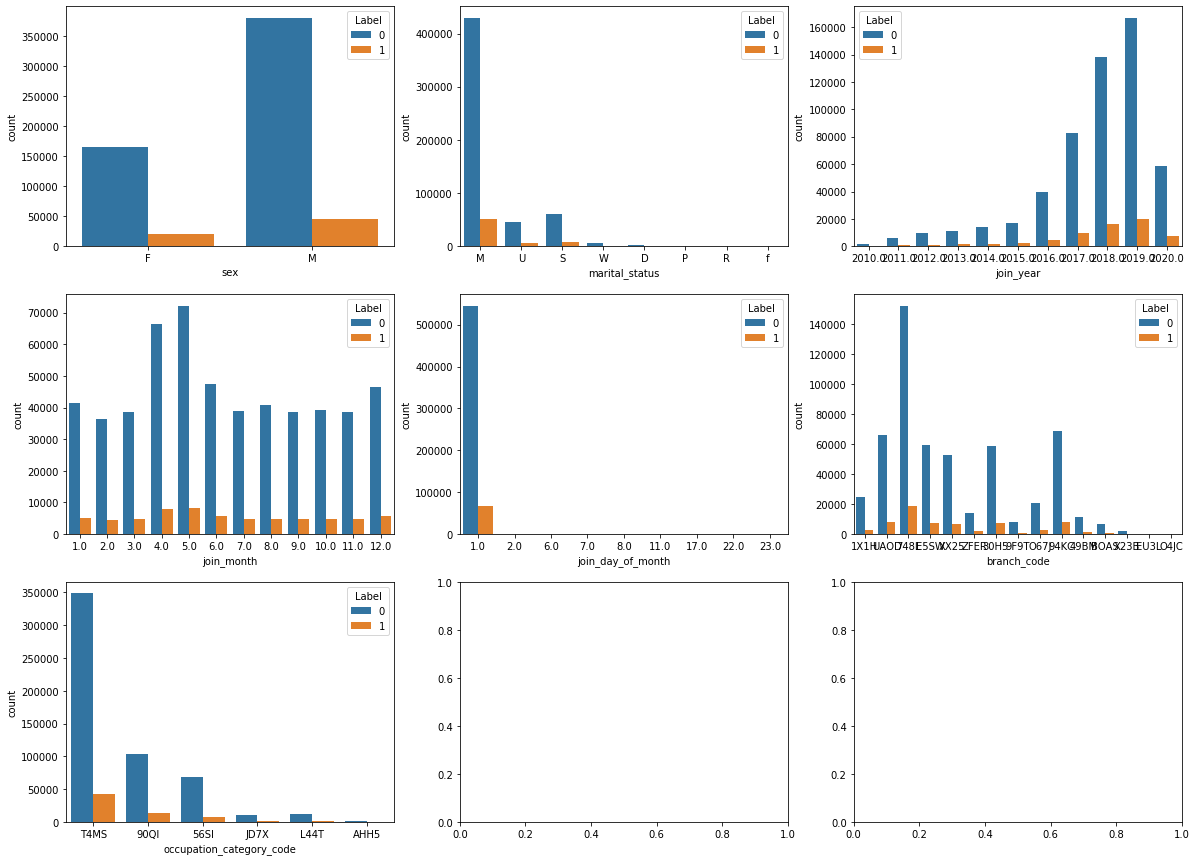

In [29]:
catagorical_features = ['sex','marital_status','join_year',"join_month",'join_day_of_month',
                        'branch_code','occupation_category_code']
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 15))
row, col = 0, 0
for i, categorical_feature in enumerate(catagorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    sns.countplot(x=categorical_feature,hue="Label",data=train,ax=ax[row, col])
#     train[categorical_feature].value_counts().plot('bar',hue="Label", ax=ax[row, col])

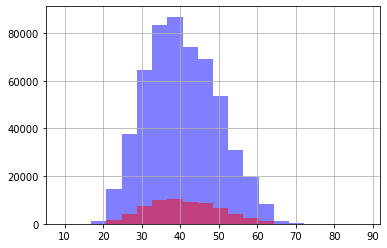

In [30]:
train[train.Label == 0]['age'].hist(bins=20, color="blue", alpha=0.5)
train[train.Label == 1]['age'].hist(bins=20, color="red", alpha=0.5)
plt.show()

### Preprocessing the data

In [31]:
### Check for null values
train.isna().sum()

ID                           0
join_date                   42
sex                          0
marital_status               0
birth_year                   0
branch_code                  0
occupation_code              0
occupation_category_code     0
PCODE                        0
Label                        0
ID X PCODE                   0
join_year                   42
join_month                  42
join_day_of_month           42
age                          0
dtype: int64

In [32]:
### dropping column with na
train.dropna(inplace=True)

In [33]:
train.isna().sum()

ID                          0
join_date                   0
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
PCODE                       0
Label                       0
ID X PCODE                  0
join_year                   0
join_month                  0
join_day_of_month           0
age                         0
dtype: int64

### Encoding

In [34]:
# encoding the binary feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['sex'] = encoder.fit_transform(train['sex'])

In [35]:
test['sex'] = encoder.fit_transform(test['sex'])

#### Handling Nominal features

In [36]:
# transform data
columns_to_encode = ['marital_status','branch_code','occupation_category_code','join_year','join_month','PCODE']
train = pd.get_dummies(train, columns=columns_to_encode,
                                     drop_first=True)
test = pd.get_dummies(test, columns=columns_to_encode,
                                     drop_first=True)

In [37]:
train.columns

Index(['ID', 'join_date', 'sex', 'birth_year', 'occupation_code', 'Label',
       'ID X PCODE', 'join_day_of_month', 'age', 'marital_status_M',
       'marital_status_P', 'marital_status_R', 'marital_status_S',
       'marital_status_U', 'marital_status_W', 'marital_status_f',
       'branch_code_30H5', 'branch_code_49BM', 'branch_code_748L',
       'branch_code_94KC', 'branch_code_9F9T', 'branch_code_BOAS',
       'branch_code_E5SW', 'branch_code_EU3L', 'branch_code_O4JC',
       'branch_code_O67J', 'branch_code_UAOD', 'branch_code_X23B',
       'branch_code_XX25', 'branch_code_ZFER', 'occupation_category_code_90QI',
       'occupation_category_code_AHH5', 'occupation_category_code_JD7X',
       'occupation_category_code_L44T', 'occupation_category_code_T4MS',
       'join_year_2011.0', 'join_year_2012.0', 'join_year_2013.0',
       'join_year_2014.0', 'join_year_2015.0', 'join_year_2016.0',
       'join_year_2017.0', 'join_year_2018.0', 'join_year_2019.0',
       'join_year_2020.0', 

In [38]:
# dropping column that we dont use in the model
train.drop(columns= ['join_date', 'birth_year','occupation_code','join_day_of_month','ID X PCODE','ID'], inplace= True)

In [103]:
# Separate majority and minority classes
#Label_0 = train[train.Label==0]
#Label_1= train[train.Label==1]

In [105]:
#up sample deposit yes
#from sklearn.utils import resample
#Label_1_upsampled = resample(Label_1, replace=True, n_samples=len(Label_0), random_state=0)

In [106]:
#upsampled_train = pd.concat([Label_0, Label_1_upsampled])

In [39]:
X = train.drop(columns = ['Label'])
y = train[['Label']]

In [40]:
X.columns

Index(['sex', 'age', 'marital_status_M', 'marital_status_P',
       'marital_status_R', 'marital_status_S', 'marital_status_U',
       'marital_status_W', 'marital_status_f', 'branch_code_30H5',
       'branch_code_49BM', 'branch_code_748L', 'branch_code_94KC',
       'branch_code_9F9T', 'branch_code_BOAS', 'branch_code_E5SW',
       'branch_code_EU3L', 'branch_code_O4JC', 'branch_code_O67J',
       'branch_code_UAOD', 'branch_code_X23B', 'branch_code_XX25',
       'branch_code_ZFER', 'occupation_category_code_90QI',
       'occupation_category_code_AHH5', 'occupation_category_code_JD7X',
       'occupation_category_code_L44T', 'occupation_category_code_T4MS',
       'join_year_2011.0', 'join_year_2012.0', 'join_year_2013.0',
       'join_year_2014.0', 'join_year_2015.0', 'join_year_2016.0',
       'join_year_2017.0', 'join_year_2018.0', 'join_year_2019.0',
       'join_year_2020.0', 'join_month_2.0', 'join_month_3.0',
       'join_month_4.0', 'join_month_5.0', 'join_month_6.0', 'join_

### Dimensionality Reduction and Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
columns_to_scale= ['age']
X[columns_to_scale]  = scaler.fit_transform(X[columns_to_scale])

In [42]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'Cumulativie Explained Varaince')

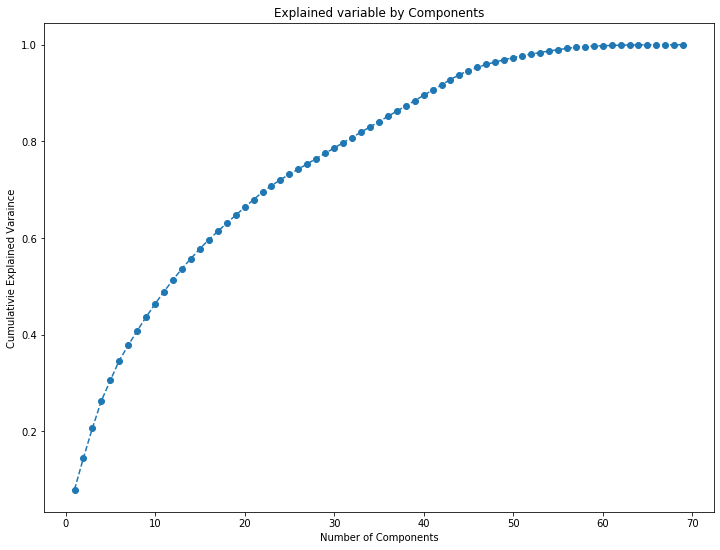

In [43]:
plt.figure(figsize=(12,9))
plt.plot(range(1,70),pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title("Explained variable by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulativie Explained Varaince")

We can choose PCA of 45-50

## Model

In [ ]:
# Fit the model

In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef, roc_auc_score

#Create a pipeline for PCA & XGBClassifier
model = Pipeline(steps=[('pca', PCA(n_components=50)), 
                            ('xgb', XGBClassifier(learning_rate =0.1,
                                                 n_estimators=1000,
                                                 max_depth=5,
                                                 min_child_weight=1,
                                                 gamma=0,
                                                 subsample=0.8,
                                                 colsample_bytree=0.8,
                                                 objective= 'binary:logistic',
                                                 nthread=4,
                                                 scale_pos_weight=1,
                                                 seed=27))
                       ])
model.fit(X,y)

C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
# Predict train and save 

In [89]:
ids = test["ID X PCODE"]

In [90]:
# dropping column that we dont use in the model
test.drop(columns= ['join_date', 'birth_year','occupation_code','join_day_of_month','ID X PCODE','ID'], inplace= True)

In [110]:
Y_pred = model.predict(test)
predictions = pd.Series()
predictions = predictions.append(pd.Series(Y_pred, index=ids))

In [111]:
submission = pd.DataFrame({"ID X PCODE": predictions.index, "Label": predictions.values})
submission.to_csv("submission.csv", index=False)